In [348]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import os

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300


In [351]:
dsets = pd.read_csv('/Users/tessa/Documents/GitHub/single_cell_perturbation_data/code/tables/dataset_info_full.csv')#, index_col=0)

In [353]:
#(dsets.index+dsets['dataset_index'])[~(dsets.index + dsets['dataset_index']).isna()]
dsets.iloc[:,1] = dsets.iloc[:,1].fillna('')
# want to change index to those when second col exists

In [354]:
dsets.index = (dsets.iloc[:,0]+'_'+dsets.iloc[:,1]).str.rstrip('_')

In [355]:
dsets.drop(index="FrangiehIzar2021_RNA", inplace = True)
dsets.drop(index = "PapalexiSatija2021_eccite_arrayed_RNA", inplace=True)
dsets.drop(index = "PapalexiSatija2021_eccite_RNA", inplace=True)

In [356]:
# correct paired datasets

dsets.loc[["FrangiehIzar2021_protein","PapalexiSatija2021_eccite_arrayed_protein",
          "PapalexiSatija2021_eccite_protein"],"Modality = Data type"] = "RNA + protein"

In [357]:
dsets

,Index (=FirstauthorLastauthorYear),dataset_index,Title,doi/url,First Author,Organisms,Modality = Data type,Method,Tissues,Number of perturbations (incl. control),...,disease,celltype,tissue type,Cancer,multiple time points?,multiple concentrations?,combined perturbations?,Date of Submission,Year,Mini-Abstract (loosely summarized original Abstract)
AdamsonWeissman2016_GSM2406675_10X001,AdamsonWeissman2016,GSM2406675_10X001,A multiplexed single-cell CRISPR screening pla...,https://doi.org/10.1016/j.cell.2016.11.048,Britt Adamson,Homo sapiens,RNA,Perturb-seq,K562,10,...,chronic myelogenous leukemia,lymphoblasts,cell_line,y,n,n,y,01.10.2019,2019,Perturb-seq is applied to dissect the mammalia...
AdamsonWeissman2016_GSM2406677_10X005,AdamsonWeissman2016,GSM2406677_10X005,A multiplexed single-cell CRISPR screening pla...,https://doi.org/10.1016/j.cell.2016.11.048,Britt Adamson,Homo sapiens,RNA,Perturb-seq,K562,21,...,chronic myelogenous leukemia,lymphoblasts,cell_line,y,n,n,y,01.10.2019,2019,Perturb-seq is applied to dissect the mammalia...
AdamsonWeissman2016_GSM2406681_10X010,AdamsonWeissman2016,GSM2406681_10X010,A multiplexed single-cell CRISPR screening pla...,https://doi.org/10.1016/j.cell.2016.11.048,Britt Adamson,Homo sapiens,RNA,Perturb-seq,K562,115,...,chronic myelogenous leukemia,lymphoblasts,cell_line,y,n,n,y,01.10.2019,2019,Perturb-seq is applied to dissect the mammalia...
AissaBenevolenskaya2021,AissaBenevolenskaya2021,,Single-cell transcriptional changes associated...,https://doi.org/10.1038/s41467-021-21884-z,Alexandre Aissa,Homo sapiens; Mus musculus,RNA,Drop-Seq,"cell lines, patient tissue, mouse xenografts",4,...,NaN,NaN,cell_line,y,partially,n,partially,01.11.2020,2020,This study uses scRNA-seq to demonstrate the e...
ChangYe2021,ChangYe2021,,Identifying transcriptional programs underlyin...,https://doi.org/10.1038/s41587-021-01005-3,Matthew Chang,Homo sapiens,RNA,clonal tagging (TraCe-seq),"lung and breast cancer cell lines PC9, MCF-10A...",4,...,lung adenocarcinoma,NaN,NaN,y,n,n,n,01.08.2021,2021,By conducting clonal fitness mapping and scRNA...
DatlingerBock2017,DatlingerBock2017,,Pooled CRISPR screening with single-cell trans...,https://doi.org/10.1038/nmeth.4177,Paul Datlinger,Homo sapiens; Mus musculus,RNA,CROP-seq,Jurkat cells (immunecells),97,...,acute T cell leukemia,T cells,cell_line,n,n,n,y,01.12.2016,2016,This study combines pooled CRISPR screening wi...
DatlingerBock2021,DatlingerBock2021,,Ultra-high-throughput single-cell RNA sequenci...,https://doi.org/10.1038/s41592-021-01153-z,Paul Datlinger,Homo sapiens,RNA,scifi-RNA-seq (derived from CROP-seq),"four human cell lines (HEK293T, Jurkat, K562, ...",48,...,acute T cell leukemia,T cells,cell_line,y,n,n,y,01.12.2019,2019,To enable cost-effective single-cell sequencin...
DixitRegev2016,DixitRegev2016,,Perturb-Seq: Dissecting Molecular Circuits wit...,https://doi.org/10.1016/j.cell.2016.11.038,Atray Dixit,Homo sapiens; Mus musculus,RNA,Perturb-seq,"BMDC, K562",31,...,myelogenous leukemia,lymphoblasts,NaN,y,partially (TF knockout screen 7 and 13 dpi),partially (different MOIs for one screen),y,01.11.2016,2016,This papers introduces Perturb-seq by analyzin...
FrangiehIzar2021_protein,FrangiehIzar2021,protein,Multimodal pooled Perturb-CITE-seq screens in ...,https://doi.org/10.1038/s41588-021-00779-1,Chris Frangieh,Homo sapiens,RNA + protein,Perturb-CITE-seq,co-culture of melanoma and TILs,249,...,melanoma,melanocytes,cell_line_co-culture,n,n,n,n,01.08.2020,2020,"In this study, the authors developed Perturb-C..."
GasperiniShendure2019_atscale,GasperiniShendure2019,atscale,A Genome-wide Framework for Mapping Gene Regul...,https://doi.org/10.1016/j.cell.2018.11.029,Molly Gasperini,Homo sapiens,RNA,CROP-seq,K562,43314 (includes combinations),...,chronic myelogenous leukemia,lymphoblasts,cell_line,y,n,n,y,01.06.2018,2018,"The authors present a multiplex, expression qu..."


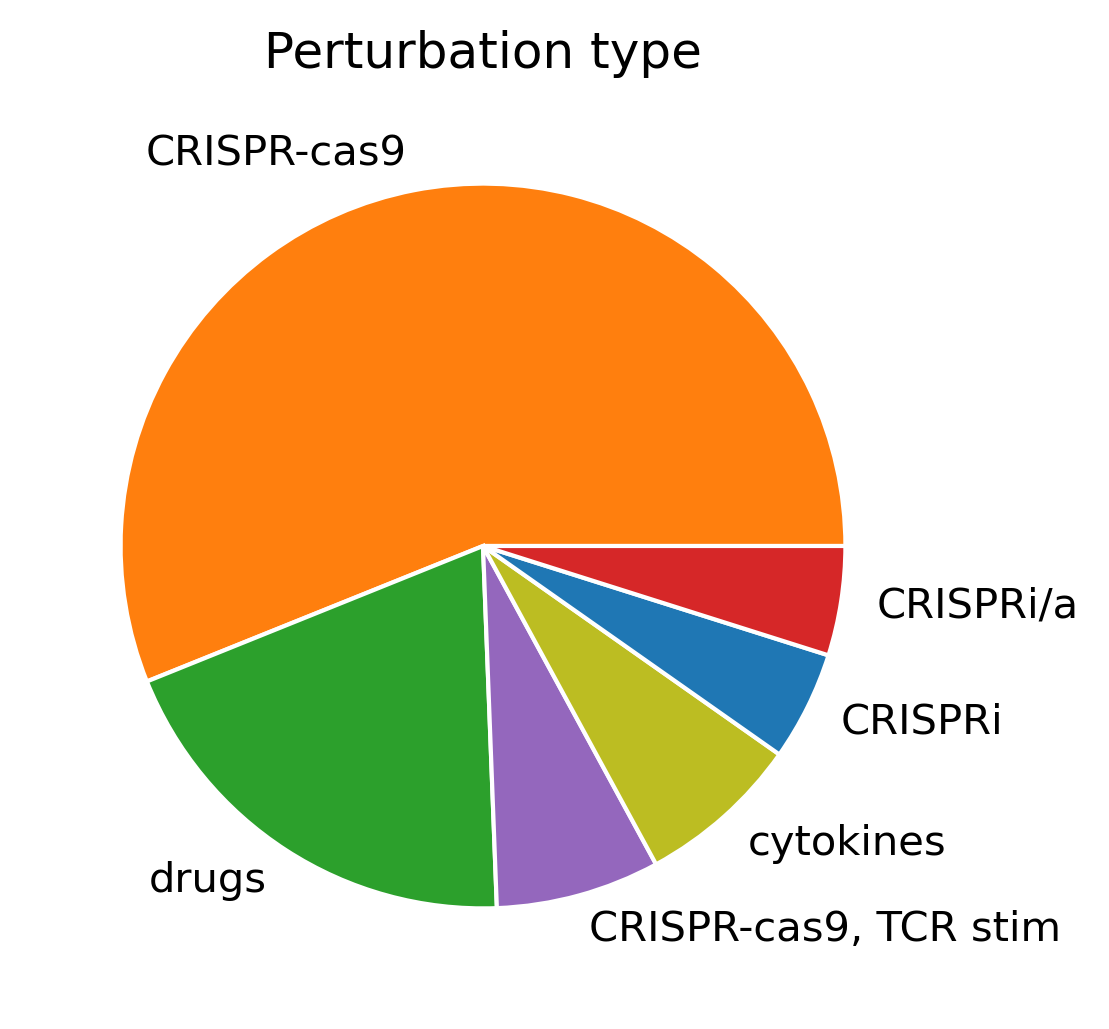

In [267]:
fig, ax = plt.subplots()

size = 0.3
vals = dsets['Perturbation'].value_counts()

colors_perturbation_types = {
    'CRISPRi': 'tab:blue', 
    'CRISPRa': 'tab:red', 
    'CRISPRi/a': 'tab:red',
    'CRISPR-cas9': 'tab:orange', 
    'drugs': 'tab:green',
    'cytokines': 'tab:olive',
    'CRISPR-cas9, TCR stim': 'tab:purple'
}


#colors = colors_perturbation_types[vals.index.values]
#cmap = plt.colormaps["tab20c"]
#outer_colors = cmap(np.arange(3)*4)
#inner_colors = cmap([1, 2, 5, 6, 9, 10])

#ax.pie(dsets['Perturbation'].value_counts(), radius=1, colors=outer_colors,
#       wedgeprops=dict(width=0.3, edgecolor='w'))
ax.pie(vals, radius=1,
       wedgeprops=dict(width=1, edgecolor='w'), labels = vals.index.values,
       colors=[colors_perturbation_types[key] for key in vals.index.values],)

#ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
#       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Perturbation type')
plt.savefig("./figs/perturbation_type.png")
plt.show()


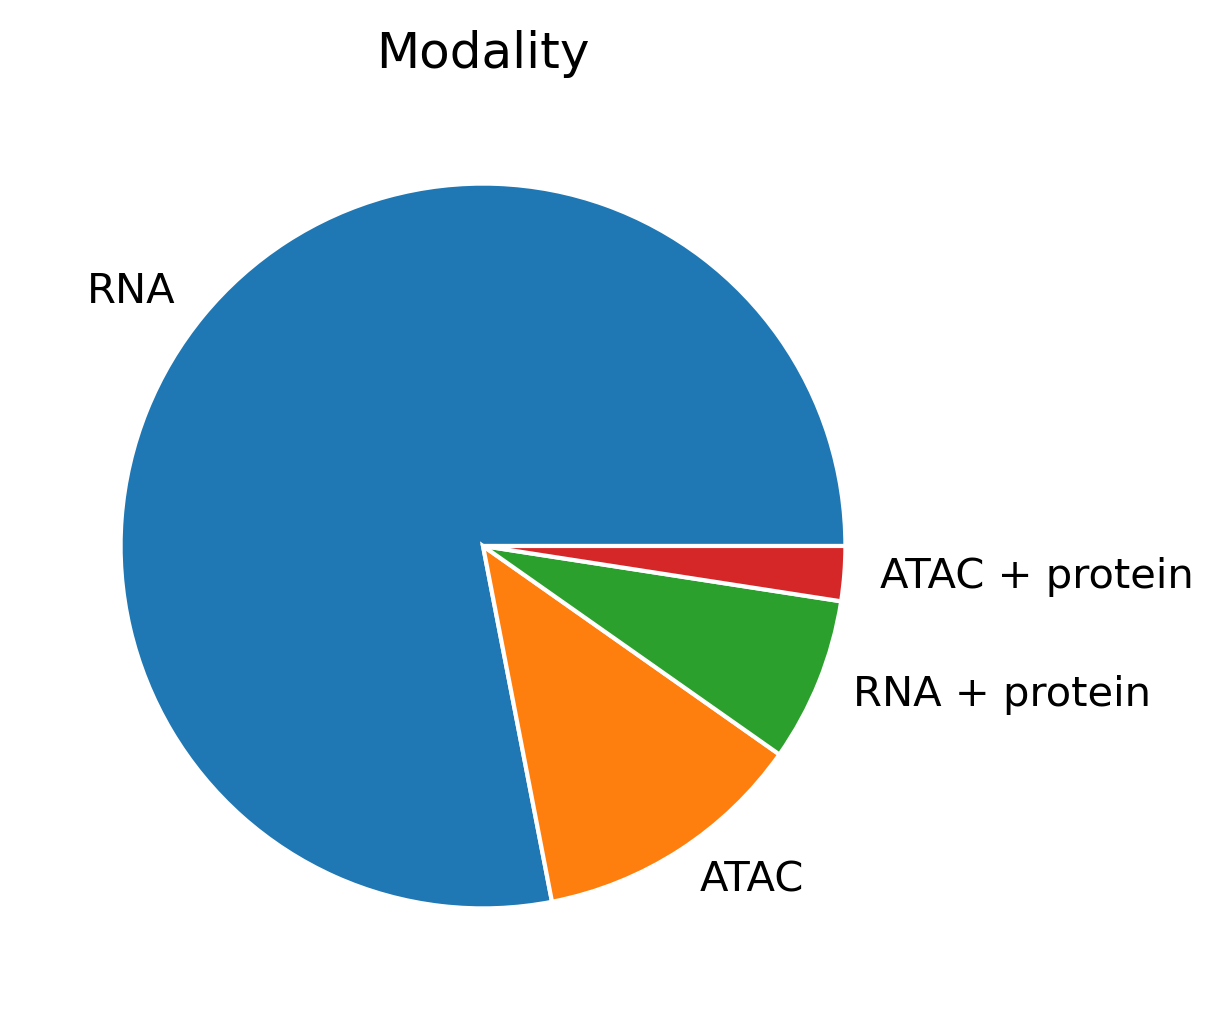

In [194]:
fig, ax = plt.subplots()

size = 0.3
vals = dsets['Modality = Data type'].value_counts()

#cmap = plt.colormaps["tab20c"]
#outer_colors = cmap(np.arange(3)*4)
#inner_colors = cmap([1, 2, 5, 6, 9, 10])

#ax.pie(dsets['Perturbation'].value_counts(), radius=1, colors=outer_colors,
#       wedgeprops=dict(width=0.3, edgecolor='w'))
ax.pie(vals, radius=1,# colors=outer_colors,
       wedgeprops=dict( edgecolor='w'), labels = vals.index.values)

#ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
#       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Modality')
plt.savefig("./figs/modality_pie.png")
plt.show()

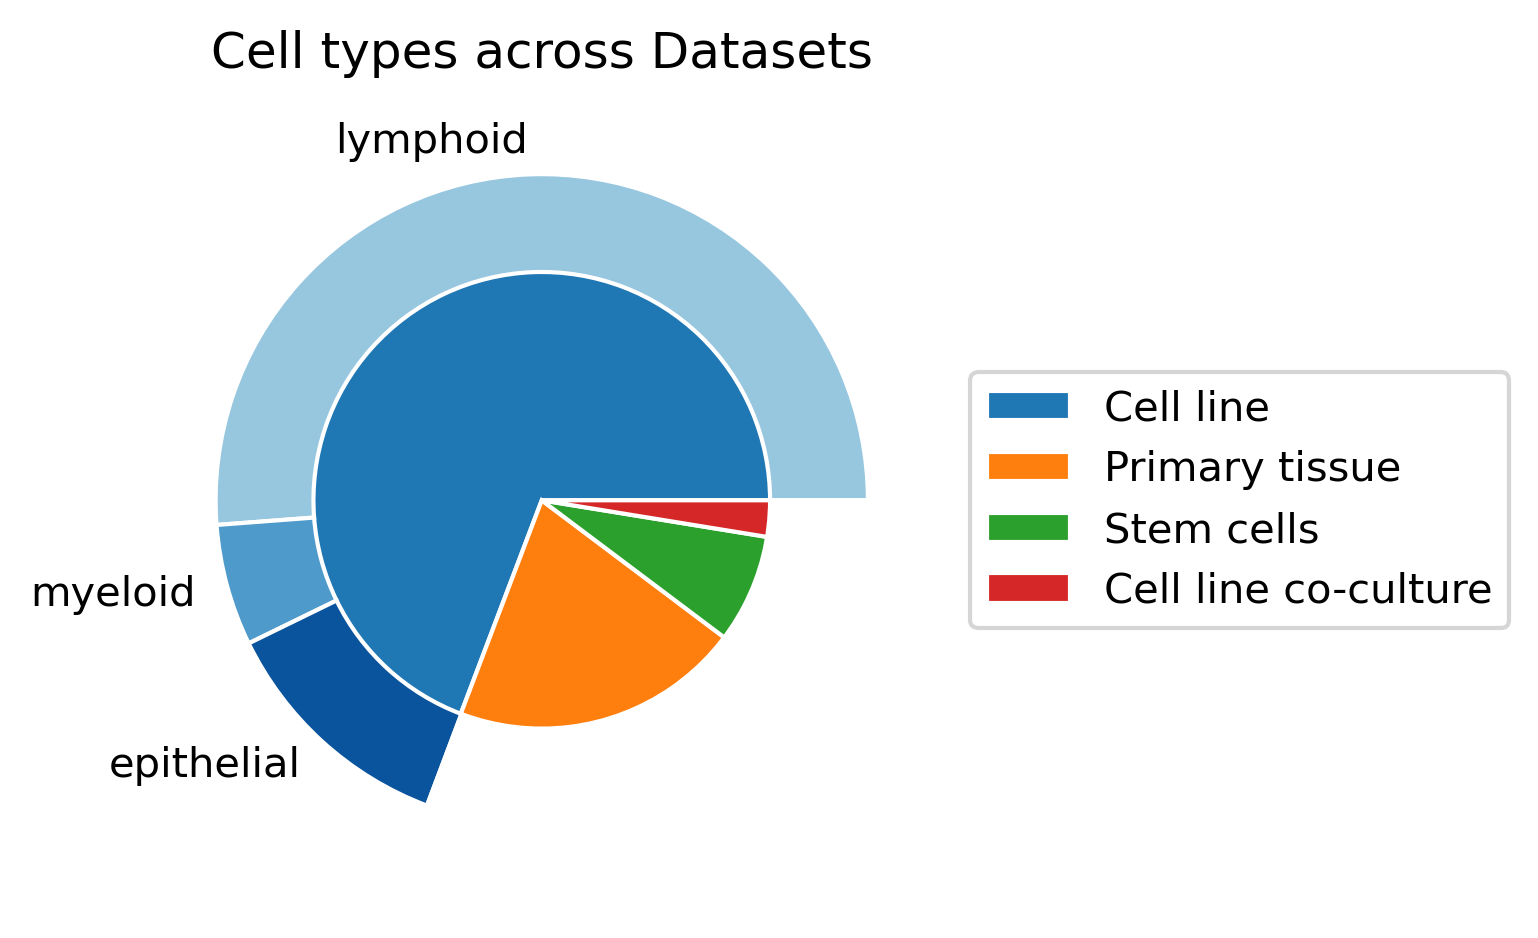

In [387]:
fig, ax = plt.subplots()

size = 0.3
vals = dsets['tissue type'].value_counts()
vals3 = pd.Series(vals3)
#vals2 = (vals2)/(sum(vals2)+5)
cmap = plt.colormaps["Blues"]

outer_colors = cmap([100,150,220,1])
outer_colors[3,:] = [1,1,1,1]
#inner_colors = cmap([1, 2, 5, 6, 9, 10])

#ax.pie(dsets['Perturbation'].value_counts(), radius=1, colors=outer_colors,
#       wedgeprops=dict(width=0.3, edgecolor='w'))
ax.pie(vals, radius=1,# colors=outer_colors,
       wedgeprops=dict(width=1, edgecolor='w'))#, labels = vals.index.values)

ax.pie(vals3, radius=1,labels = vals3.index.values, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

ax.set(aspect="equal", title='Cell types across Datasets')
#plt.legend(labels= vals.index.values, loc="right")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),labels= ["Cell line", "Primary tissue",
                                                             "Stem cells", "Cell line co-culture"]) #vals.index.values)

plt.savefig("./figs/nested_grouped.png",bbox_inches='tight')
plt.show()